In [1]:
%load_ext autoreload

In [2]:
%autoreload 1
from pathlib import Path
from pipelines.idl_preprocess import IDL_PREPROCESS, Compose
from pipelines.default_pipelines import CROP_TIME, DROP_OUTLIER
pl = IDL_PREPROCESS()

c:\Users\Imageanalysis\anaconda3\envs\hitips2\Lib\site-packages\cellpose\resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename,

In [13]:
exp_list = [r"Y:\Lab Notebooks\Ike\004-4",
            ] # for processing multiple experiments at once
fpath_list = [sorted(Path(exp_path).glob("*.tif")) for exp_path in exp_list] # search exp_path folders for ome tifs 
fpath_list = [x for p_list in fpath_list for x in p_list]
out_paths = [fpath.parent.joinpath("new"+str(Path(fpath.stem).stem)) for fpath in fpath_list]

print(fpath_list)
print(out_paths)

[WindowsPath('Y:/Lab Notebooks/Ike/004-4/004-4_FN_STRETCH_2_MaxIP_XY1_t430.ome.tif'), WindowsPath('Y:/Lab Notebooks/Ike/004-4/004-4_FN_STRETCH_2_MaxIP_XY2_t577.ome.tif')]
[WindowsPath('Y:/Lab Notebooks/Ike/004-4/new004-4_FN_STRETCH_2_MaxIP_XY1_t430'), WindowsPath('Y:/Lab Notebooks/Ike/004-4/new004-4_FN_STRETCH_2_MaxIP_XY2_t577')]


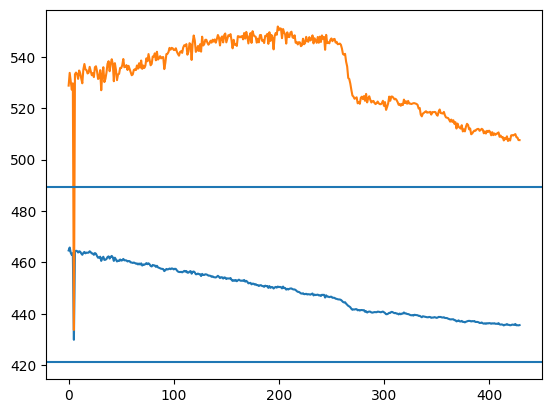

(430, 2, 976, 976) (429, 2, 976, 976)


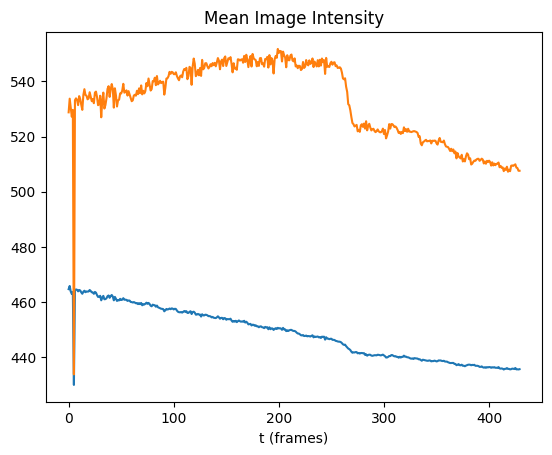

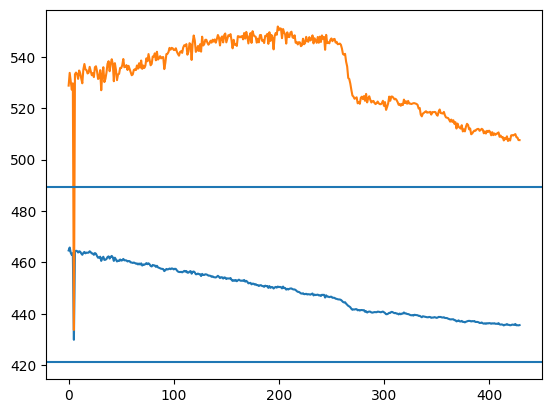

(430, 2, 976, 976) (429, 2, 976, 976)
{'diameter': 40}


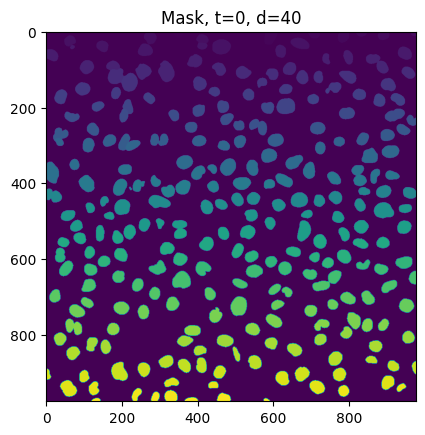

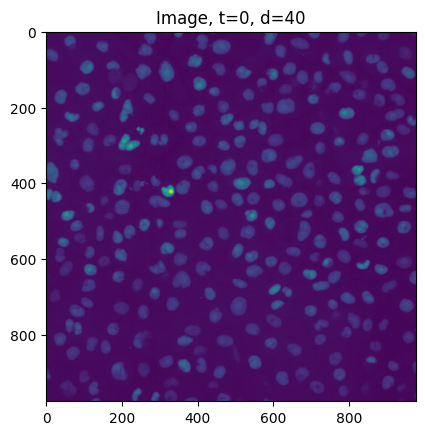

{'diameter': 45}


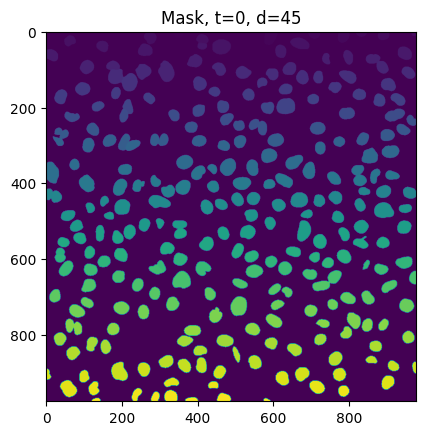

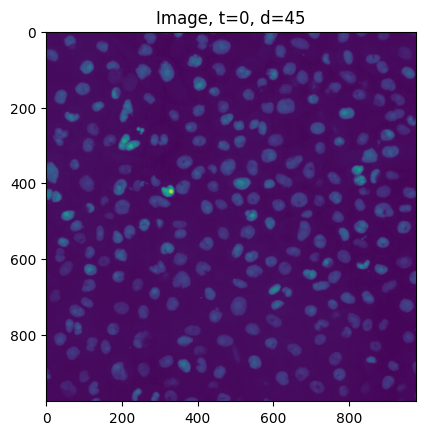

{'diameter': 50}


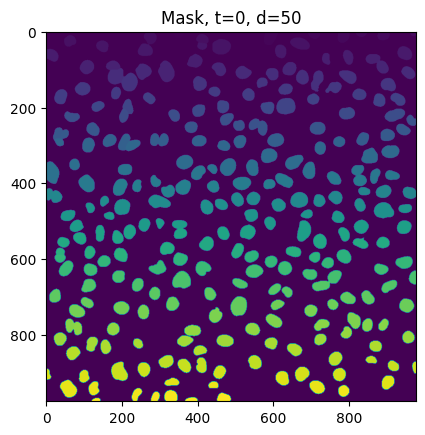

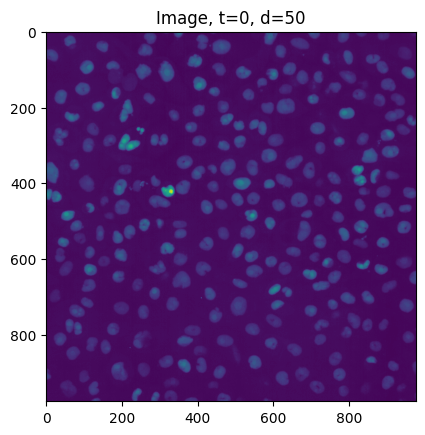

{'diameter': 55}


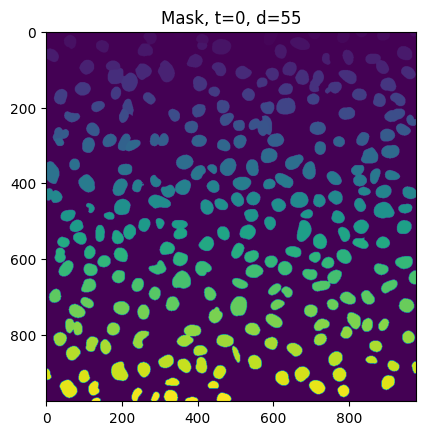

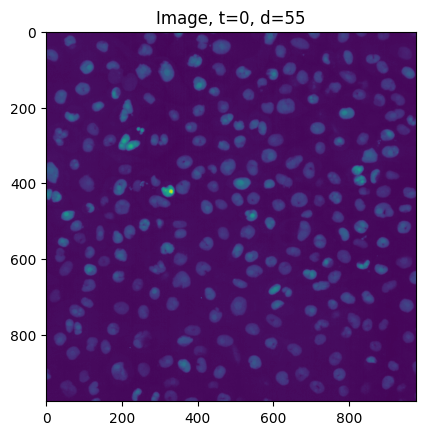

{'diameter': 40}


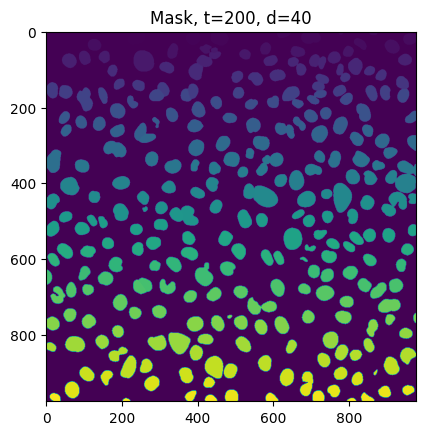

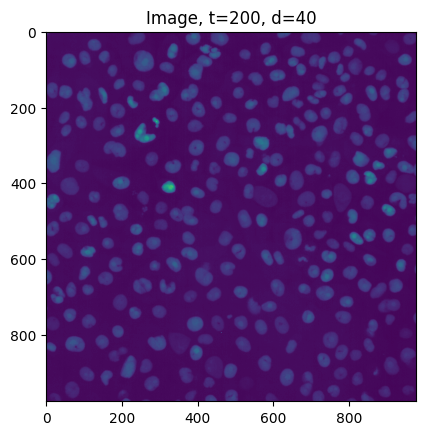

{'diameter': 45}


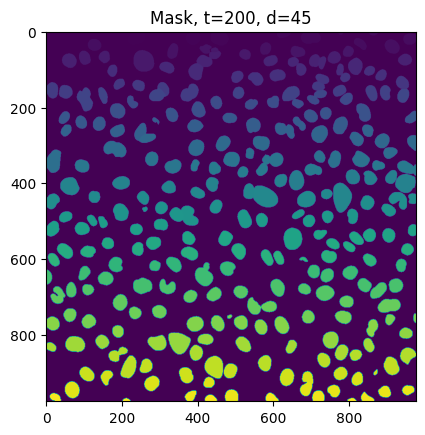

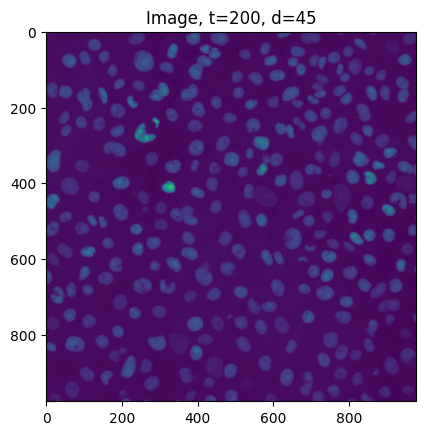

{'diameter': 50}


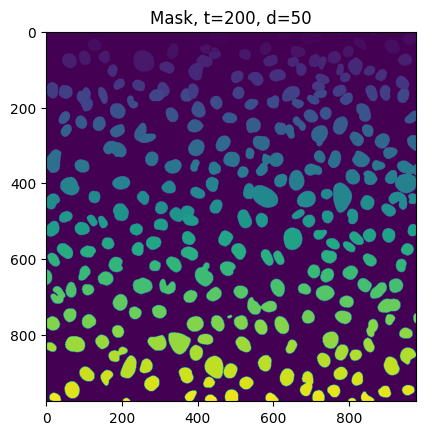

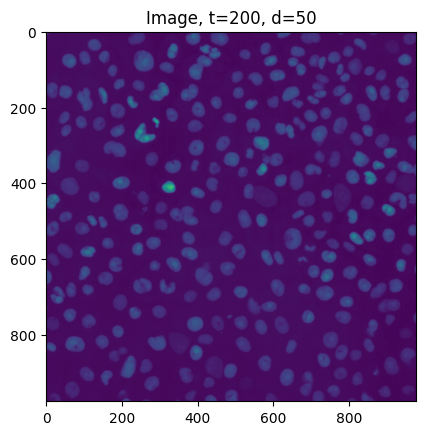

{'diameter': 55}


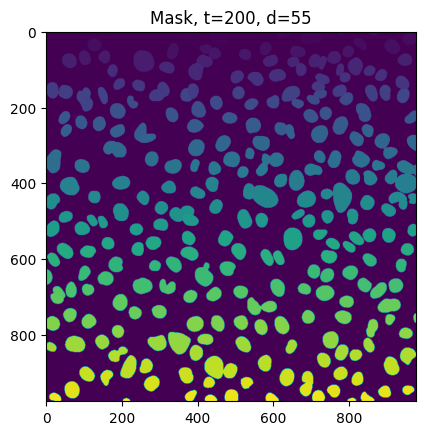

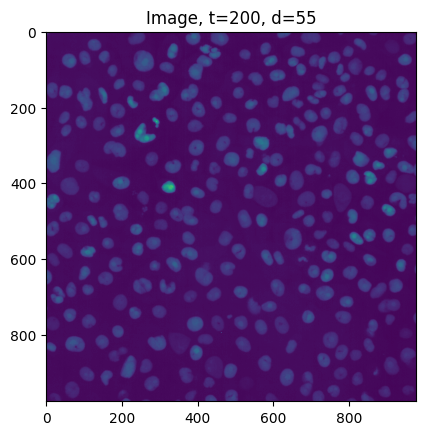

{'diameter': 40}


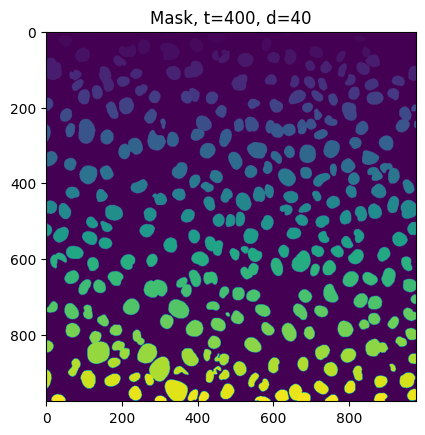

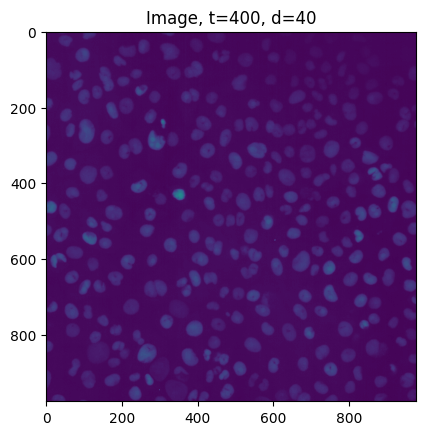

{'diameter': 45}


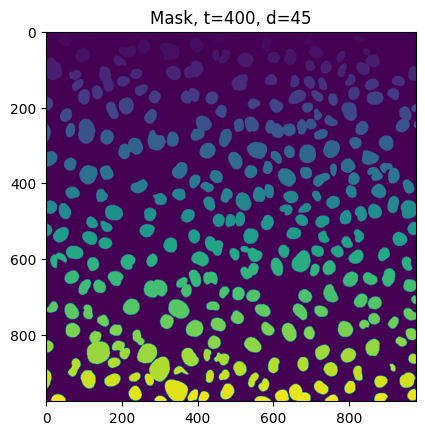

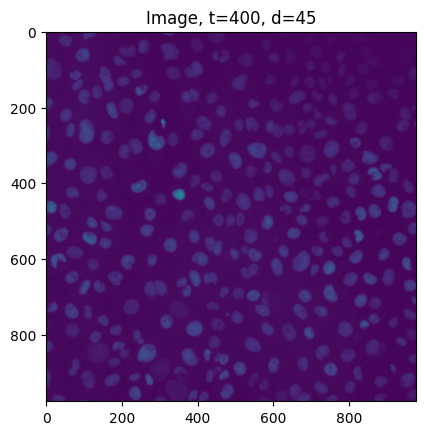

{'diameter': 50}


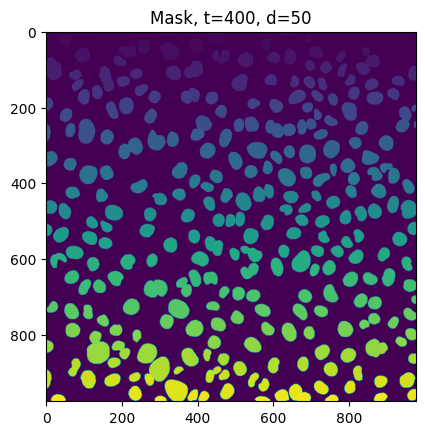

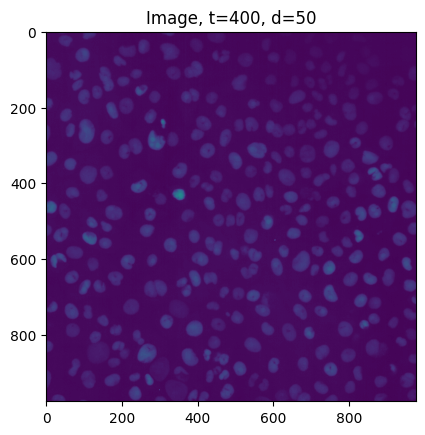

{'diameter': 55}


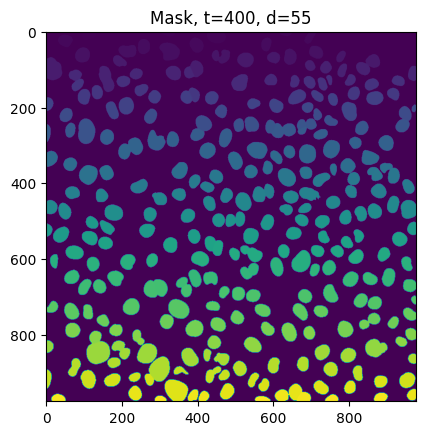

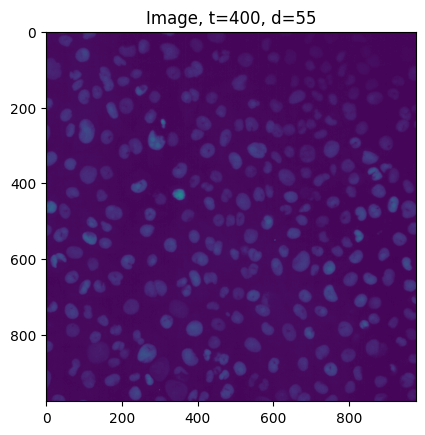

In [14]:
# Run to test segmentation parameters and check for missing frames
pl.load_image(fpath_list[0])
DROP_OUTLIER(3)(pl.cached_image)
pl.test(diameters=[40, 45, 50, 55])


In [7]:
pl.preprocess.append(DROP_OUTLIER(3))

In [8]:
pl.segment.set_args(diameter=53) # set parameter you are satisfied with

Set:  diameter  to:  53


reading
preprocessing whole FOV


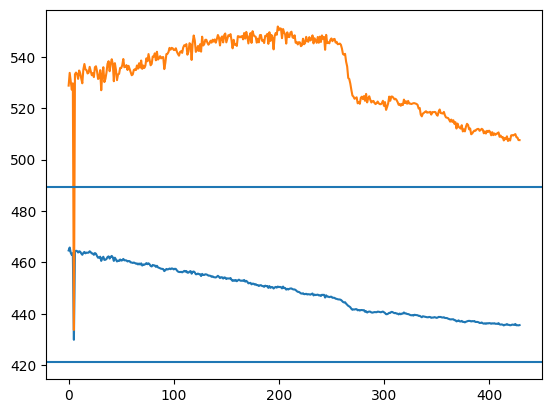

(430, 2, 976, 976) (429, 2, 976, 976)
segmenting image
segmenting...


100%|██████████| 16/16 [04:50<00:00, 18.17s/it]


writing mask...
isolating nuclei


[INFO][2025/05/02 04:17:34 PM] Localizing objects from segmentation...
progress: 100%|██████████| 429/429 [00:45<00:00,  9.46it/s]
[INFO][2025/05/02 04:18:20 PM] Objects are of type: <class 'dict'>
[INFO][2025/05/02 04:18:21 PM] ...Found 121362 objects in 429 frames.
[INFO][2025/05/02 04:18:21 PM] Loaded btrack: C:\Users\Imageanalysis\anaconda3\envs\hitips2\Lib\site-packages\btrack\libs\libtracker.DLL
[INFO][2025/05/02 04:18:21 PM] Starting BayesianTracker session
[INFO][2025/05/02 04:18:21 PM] Loading configuration file: default_configs\tracker_config.json
[INFO][2025/05/02 04:18:21 PM] Objects are of type: <class 'list'>
[INFO][2025/05/02 04:18:21 PM] Starting tracking... 
[INFO][2025/05/02 04:18:21 PM] Update using: ['MOTION']
[INFO][2025/05/02 04:18:21 PM] Tracking objects in frames 0 to 99 (of 429)...
[INFO][2025/05/02 04:18:27 PM]  - Timing (Bayesian updates: 59.00ms, Linking: 0.00ms)
[INFO][2025/05/02 04:18:27 PM]  - Probabilities (Link: 1.00000, Lost: 1.00000)
[INFO][2025/05/02

photobleach + registration
correcting photobleaching...
registering nuclei...
post processing for IDL
reading
preprocessing whole FOV


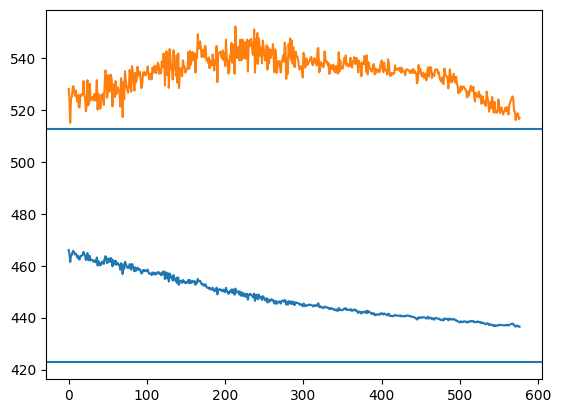

(577, 2, 976, 976) (577, 2, 976, 976)
segmenting image
segmenting...


100%|██████████| 16/16 [12:41<00:00, 47.60s/it]


writing mask...
isolating nuclei


[INFO][2025/05/02 04:45:46 PM] Localizing objects from segmentation...
progress: 100%|██████████| 577/577 [01:02<00:00,  9.19it/s]
[INFO][2025/05/02 04:46:49 PM] Objects are of type: <class 'dict'>
[INFO][2025/05/02 04:46:51 PM] ...Found 163203 objects in 577 frames.
[INFO][2025/05/02 04:46:51 PM] Loaded btrack: C:\Users\Imageanalysis\anaconda3\envs\hitips2\Lib\site-packages\btrack\libs\libtracker.DLL
[INFO][2025/05/02 04:46:51 PM] Starting BayesianTracker session
[INFO][2025/05/02 04:46:51 PM] Loading configuration file: default_configs\tracker_config.json
[INFO][2025/05/02 04:46:51 PM] Objects are of type: <class 'list'>
[INFO][2025/05/02 04:46:51 PM] Starting tracking... 
[INFO][2025/05/02 04:46:51 PM] Update using: ['MOTION']
[INFO][2025/05/02 04:46:51 PM] Tracking objects in frames 0 to 99 (of 577)...
[INFO][2025/05/02 04:46:56 PM]  - Timing (Bayesian updates: 50.00ms, Linking: 8.00ms)
[INFO][2025/05/02 04:46:56 PM]  - Probabilities (Link: 0.99996, Lost: 0.36688)
[INFO][2025/05/02

photobleach + registration
correcting photobleaching...
registering nuclei...
post processing for IDL


In [15]:
# run when args are set 
for fpath, outpath in zip(fpath_list, out_paths): 

    pl.run(fpath, outpath) # May crash due to btrack but no amount of exception handling can fix that